# Umfrage zum Umgang mit KI in Haus- und Abschlussarbeiten 2025

Im Rahmen der Statistik I Vorlesung haben wir eine Umfrage zum Thema "Umgang mit KI in Haus- und Abschlussarbeiten" durchgeführt. Die Daten finden Sie in `umfrage.csv`.

Der Schlüssel zur Spalte `preference` ist wie folgt:

Frage: In welcher Form sollte die Universität die Benutzung von künstlicher Intelligenz in schriftlichen Studien- und Abschlussarbeiten Ihrer Meinung nach regulieren?
 * 1 = Gar nicht.
 * 2 = Es sollte eine einfache Handreichung geben, die Studierende im Umgang mit KI schult, sonst nichts.
 * 3 = Pflicht, in einem Satz zu erwähnen, ob und wenn ja, welche KI wozu eingesetzt wurde.
 * 4 = Ein ausführlicher Text im Abschnitt ""Methoden"", in dem der Einsatz von KI dokumentiert wird (z. B. auf 1 DIN-A4-Seite).
 * 5 = Zusätzlich zu (3) Erfassung der Textentwicklung durch Versionskontrolle, welche die Abwandlung von KI-generiertem Text retrospektiv nachvollziehbar macht.
 * 6 = Zusätzlich zu (4) genaue Auflistung von KI-Modellen und im Bereich LLMs Prompts (inkl. Modell, Datum, Zeit), Antworten bzw. Auto-Ergänzungen im Anhang.
 * 7 = Jeglicher Einsatz von KI sollte genauestens dokumentiert werden müssen (z. B. lückenlose Videoaufzeichnung vom Schreibprozess).
 * 8 = Der Einsatz von KI sollte verboten sein."

Die Frage ist: Sind die Präferenzen von Studierenden, die den Abschluss Staatsexamen anstreben, verschieden von den Präferenzen der Studierenden, die einen Bachelor- oder Masterabschluss anstreben?

Wir importieren die Daten in Python:

In [5]:
import pandas as pd
df = pd.read_csv('umfrage.csv')
df.head()

,Zeitstempel,Angestrebter Studienabschluss,Preference
0,25.06.2025 16:59:54,Staatsexamen,4
1,25.06.2025 17:01:07,Bachelor of Science / Master of Science,3
2,25.06.2025 17:08:38,Staatsexamen,4
3,25.06.2025 17:21:17,Bachelor of Science / Master of Science,3
4,25.06.2025 17:24:35,Staatsexamen,4


Die Zielvariable 'Preference' ist ordinal skaliert. Wir erstellen einen Boxplot:

<Figure size 800x500 with 0 Axes>

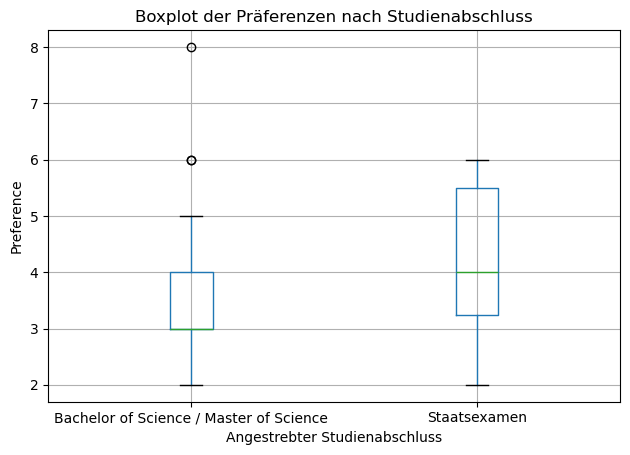

In [6]:
import matplotlib.pyplot as plt

# Boxplot erstellen
plt.figure(figsize=(8, 5))
df.boxplot(column="Preference", by="Angestrebter Studienabschluss")
plt.title("Boxplot der Präferenzen nach Studienabschluss")
plt.suptitle("")
plt.xlabel("Angestrebter Studienabschluss")
plt.ylabel("Preference")
plt.grid(True)
plt.tight_layout()
plt.show()

## Mit welchem Test können wir die Frage beantworten?

t-Test/Welch t-Test setzen eine metrische Skalierung voraus, sind hier wenig geeignet.

Wilcoxon-Test hat folgende Voraussetzungen:

 * Varianzhomogenität ✅
 * Eigentlich: ähnlche Verteilung (hier Grenzfall...)
 * 2 Stichproben ✅
 * mindestens ordinale Skalierung ✅

## Wir formulieren die Hypothesen:

H₀: 𝑃(Preference₁ > Preference₂) = 0.5

H₁: 𝑃(Preference₁ > Preference₂) ≠ 0.5

In Worten:

 * Null hypothesis (H₀): The distribution of Preference values is the same in both groups (no difference in central tendency).
 * Alternative hypothesis (H₁): The distribution of Preference values is different between the two groups (could be higher or lower in either group).

## Wir führen den Wilcoxon-Test mit einem Alpha-Fehler von 5% durch:

In [8]:
import scipy.stats as scs

# Gruppen extrahieren
staatsexamen = df[df["Angestrebter Studienabschluss"] == "Staatsexamen"]["Preference"]
bachelormaster = df[df["Angestrebter Studienabschluss"] == "Bachelor of Science / Master of Science"]["Preference"]

# Mann-Whitney-U-Test durchführen
result = scs.mannwhitneyu(staatsexamen, bachelormaster, alternative='two-sided', use_continuity=False)

# Ergebnis ausgeben
print(result)

MannwhitneyuResult(statistic=432.0, pvalue=0.16285483507758947)


Der p-Wert ist größer als der Alpha-Fehler, d.h. wir müssen die Nullhypothese beibehalten. Die Präferenzen unterscheiden sich mit unbekannter Irrtumswahrscheinlichkeit nicht.

## Wir visualisieren die Gesamtdaten (interessehalber):

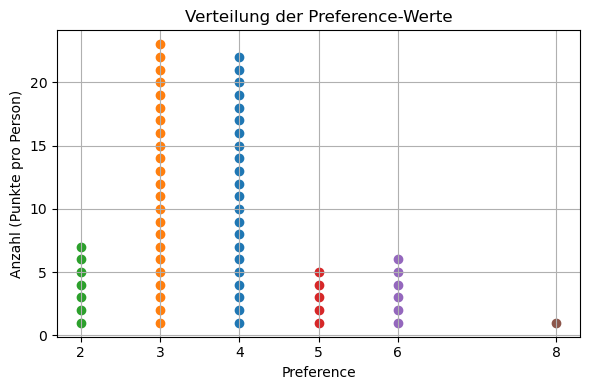

In [9]:
from collections import Counter

counts = Counter(df["Preference"])

# Scatter-ähnlicher Plot: Jeder Punkt einzeln gezeichnet
plt.figure(figsize=(6, 4))
for preference, count in counts.items():
    plt.scatter([preference]*count, list(range(1, count+1)), label=f"Preference {preference}")

plt.title("Verteilung der Preference-Werte")
plt.xlabel("Preference")
plt.ylabel("Anzahl (Punkte pro Person)")
plt.xticks(sorted(df["Preference"].unique()))
plt.grid(True)
plt.tight_layout()
plt.show()